In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2

In [2]:
#hand written characters 28x28 sized images of 0...9
mnist=tf.keras.datasets.mnist

### Fixed the download problem using the link below.

Mac: /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/utils/data_utils.py 

https://github.com/tensorflow/tensorflow/issues/33285

In [3]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

## Train data
- x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

- y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
## Test data
- x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.    Pixel values range from 0 to 255.

- y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

#### Shape of the train/test data

In [4]:
print("Shape of the train/test data\nx_train:",x_train.shape,
"\ny_train:",y_train.shape,
"\n x_test:",x_test.shape,
"\n y_test:",y_test.shape)

Shape of the train/test data
x_train: (60000, 28, 28) 
y_train: (60000,) 
 x_test: (10000, 28, 28) 
 y_test: (10000,)


## Before normalization
In the color spectrum, 0 represents black and 255 represents white color.

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
def plot_digit(elem, c_map=plt.cm.binary):
    '''
    DEFAULT:        colormap=plt.cm.binary
    image in color: colormap=None
    This function displays 1 element of the data as an image
    '''
    fig = plt.figure()
    ax = fig.add_subplot()
    fig.subplots_adjust(top=0.85)
    # Set titles for the figure and the subplot respectively
    # Display data as an image
    fig.suptitle('Numpy array element converted to Image', fontsize=14, fontweight='bold')
    if c_map==None:
        ax.set_title('Data visualization for 1 digit')
    else:
        ax.set_title('Data visualization for 1 digit (Binary colormap)')
    # plt.imshow: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
    # cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # changed to colormap of the nparray->image into binary 
    plt.imshow(elem,cmap=c_map)
    plt.show()


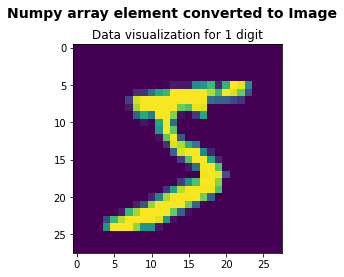

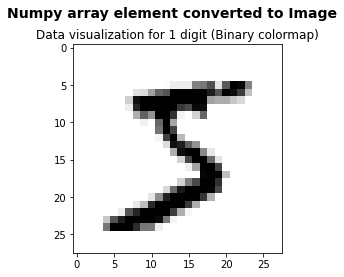

In [7]:
plot_digit(x_train[0],None)
plot_digit(x_train[0])

## Normalize

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

## After Normalization

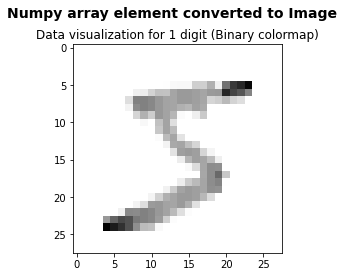

In [9]:
plot_digit(x_train[0])

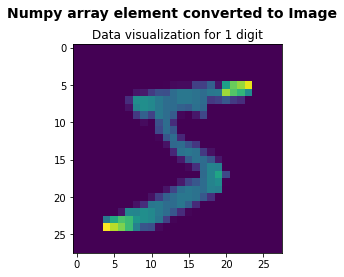

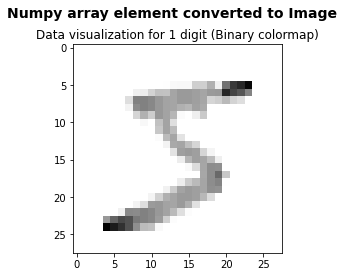

In [10]:
plot_digit(x_train[0],None)
plot_digit(x_train[0])

In [11]:
#the label inside the network
print(y_train[0])

5


### Resizing the image for Convolutional Operation

In [12]:
IMG_SIZE=28
#increasing dimension by 1 for kernel=filter operation
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE,IMG_SIZE,1)  #reshape(60 000,28,28,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE, IMG_SIZE,1)
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a DNN (Deep Neural Network)
Training with 60,000 samples

In [13]:
# create a neural net
model=Sequential()

# first convolution layer  (60000,28,28,1) 28-3+1=26x26
model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:])) # 64 filters with size of 3x3, extract 
model.add(Activation("relu")) # activation function to make it non-linear, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling single maximum value of 2x2

# 2nd convolution layer    26-3+1=24x24
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd convolution layer
model.add(Conv2D(64,(3,3)))  #13x13
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer #1   20x20=400
model.add(Flatten()) #before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))    #each 400 will be connected to each 64 neurons
model.add(Activation("relu"))

# Fully connected layer #2   20x20=400
model.add(Dense(32))    # decreasing the size gradually, we're trying to reach 10 bc we have labelled 10 digits 
model.add(Activation("relu"))

# Fully connected layer #3 (LAST-aka the decision layer)   20x20=400
model.add(Dense(10))    # the last dense layer must be equal to 10 (there are 10 different digits)
model.add(Activation("softmax")) #activation with Softmax (can also be sigmoid for BINARY classification)(class probabilities, not for binary)
# softmax is useful for probability distributions

2021-12-04 14:59:10.568571: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [15]:
print("Total Traning Sample =",len(x_trainr))

Total Traning Sample = 60000


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

## Training the model

Before training a model, you need to configure the learning process, which is done via the compile method.

source: https://faroit.com/keras-docs/1.0.6/getting-started/sequential-model-guide/

In [17]:
model.fit(x_trainr, y_train, epochs=5,validation_split=0.3)

2021-12-04 14:59:11.343244: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1313/1313 [==============================] - 32s 24ms/step - loss: 0.3354 - accuracy: 0.8956 - val_loss: 0.1160 - val_accuracy: 0.9658
Epoch 2/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.1055 - accuracy: 0.9681 - val_loss: 0.0891 - val_accuracy: 0.9723
Epoch 3/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0718 - accuracy: 0.9779 - val_loss: 0.0763 - val_accuracy: 0.9772
Epoch 4/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0633 - val_accuracy: 0.9806
Epoch 5/5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0596 - val_accuracy: 0.9822


 For example if ( val_accuracy=30 and accuracy=98 ) => overfitting (solution example: you can dropout (some) layer(s))

## Predictions

In [18]:
# preditions are an array of class probabilities, so we need to decode them
predictions=model.predict([x_testr])

In [19]:
print(predictions) 

[[7.48949436e-09 1.50501194e-06 1.52086295e-06 ... 9.99994159e-01
  1.12047524e-10 2.63389711e-06]
 [4.50947147e-04 7.59677205e-05 9.99301910e-01 ... 9.58440869e-05
  8.42599457e-06 1.51711367e-06]
 [4.58852492e-06 9.99863744e-01 4.23763731e-06 ... 2.40078734e-05
  1.36809049e-05 4.45066007e-06]
 ...
 [4.05682172e-08 1.20502727e-06 2.08747451e-06 ... 2.04370990e-05
  5.89250612e-06 3.27615362e-06]
 [1.10972371e-06 2.27663250e-07 6.76003836e-11 ... 9.30798216e-10
  5.99001987e-06 5.37833841e-07]
 [1.22674228e-05 3.86574271e-07 2.72719785e-06 ... 1.45429855e-08
  8.38518463e-06 4.01605466e-05]]


## Evaluating the predictions
 Comparing test data vs predicted data

In [20]:
# in order to understand, convert the predictions from one hot encoding, we need to use numpy for that 
# argmax returns the max value index and find the value of it
print(np.argmax(predictions[0]))

7


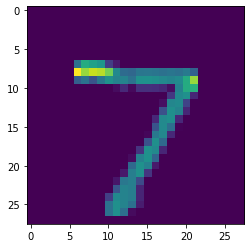

In [21]:
plt.imshow(x_test[0])

In [22]:
print(np.argmax(predictions[128]))

8


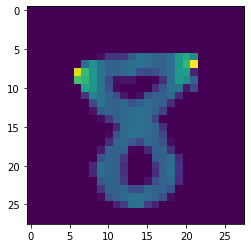

In [23]:
plt.imshow(x_test[128])

In [24]:
model.save('/tmp/model')

2021-12-04 15:01:43.163457: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/model/assets


In [25]:
loaded_model = tf.keras.models.load_model('/tmp/model')

In [50]:
img = cv2.imread('89.png')
#img = cv2.imread('b8.png')
#img = cv2.imread('ba.png')

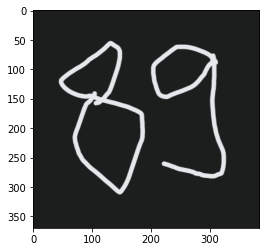

In [51]:
plt.imshow(img)

In [52]:
img.shape

(370, 385, 3)

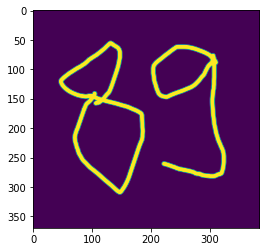

In [53]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [54]:
gray.shape

(370, 385)

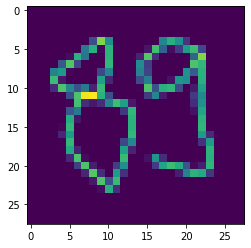

In [55]:
resized=cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
plt.imshow(resized)

In [56]:
resized.shape

(28, 28)

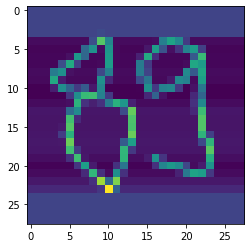

In [57]:
norm_img=tf.keras.utils.normalize(resized,axis=1) # 0 to 1 scaling
plt.imshow(norm_img)

In [58]:
norm_img=np.array(norm_img).reshape(-1, IMG_SIZE, IMG_SIZE,1) #kernel operation of convolution layer

In [59]:
print(type(norm_img),"\n",
        norm_img.dtype,"\n",
        norm_img.shape)

<class 'numpy.ndarray'> 
 float64 
 (1, 28, 28, 1)


In [60]:
predictions=loaded_model.predict(norm_img)

In [61]:
print(np.argmax(predictions))

8
